In [1]:
from importlib import reload

In [2]:
import torch
from torchvision import models
from itertools import chain
from collections import OrderedDict
import copy
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import transform
import pandas as pd
import json
from train_mnist_model import Net as ConvNet
from train_resnet_model import model as resnet
from LRP import LRP
from train_mnist_model import preprocessing

In [3]:
def norm_tensor(tensor):
    tensor = tensor - tensor.min()
    tensor = tensor / tensor.max()
    return tensor

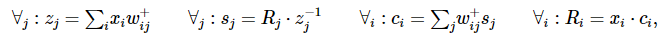

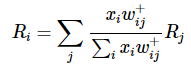

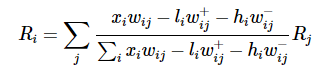

# MNIST test

## Conv net

In [4]:
model = ConvNet()
model.load_state_dict(torch.load('mnist_model.ph'))
model = model.eval()

In [5]:
lrp = LRP(model)

In [6]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                            transform=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Lambda(preprocessing),

#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
                             ])),
  batch_size=1, shuffle=True)

Label  3
Prediction 3
relevance mean tensor(0.0431)


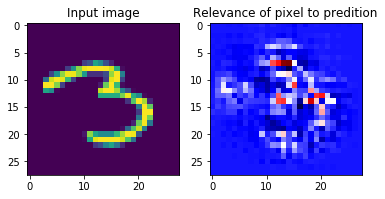

Label  8
Prediction 8
relevance mean tensor(0.0360)


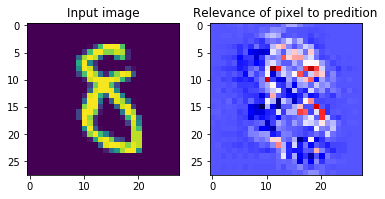

Label  0
Prediction 0
relevance mean tensor(0.0676)


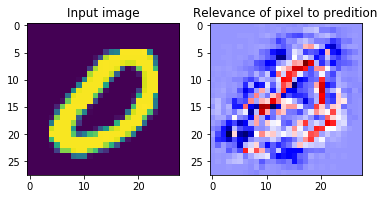

Label  2
Prediction 2
relevance mean tensor(0.0666)


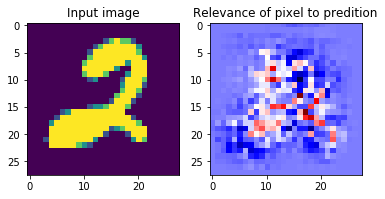

In [16]:
cmap = plt.cm.get_cmap('seismic')
for num, (image, label) in enumerate(test_loader):
    if num > 3:
        break
    print('Label ', label.item())
    output = lrp.forward(image)
    print('Prediction', output.argmax().item())
    _, ax = plt.subplots(1,2)
    ax[0].imshow(image.squeeze())
    ax[0].title.set_text('Input image')
    relevance = lrp(output)
    print('relevance mean', relevance.abs().mean())
    ax[1].imshow(cmap(norm_tensor(relevance.squeeze())))
    ax[1].title.set_text('Relevance of pixel to predition')
    plt.show()
  

#### Mistakes

Label  5
Prediction 7


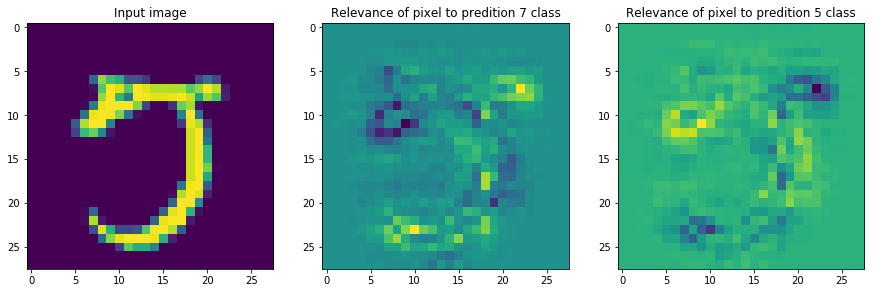

Label  7
Prediction 2


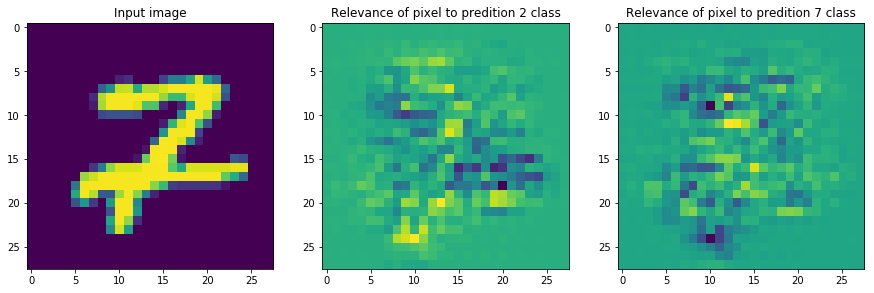

Label  7
Prediction 1


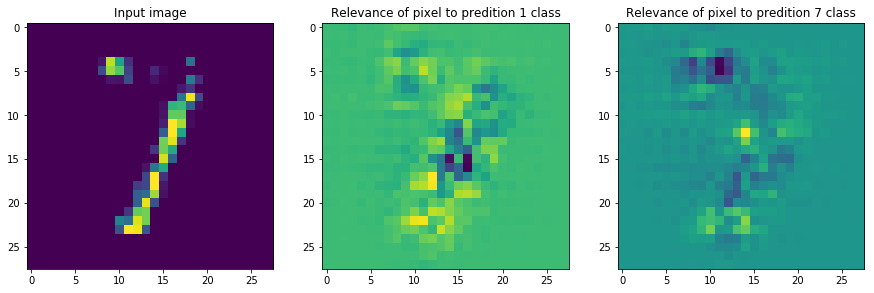

Label  9
Prediction 4


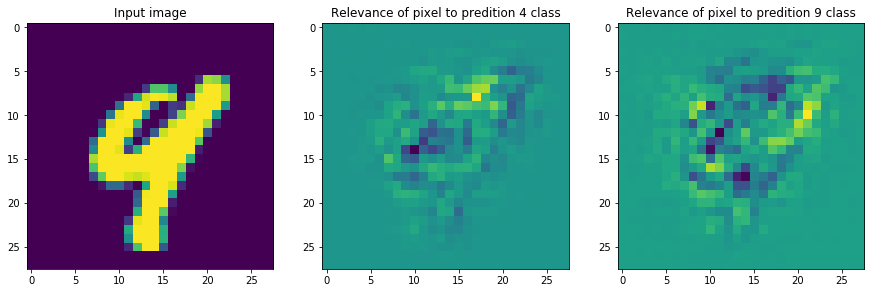

In [20]:
count = 0
for num, (image, label) in enumerate(test_loader):
    if count > 3:
        break
    output = lrp.forward(image)
    if output.argmax() != label:
        count += 1
        print('Label ', label.item())
        print('Prediction', output.argmax().item())
        _, ax = plt.subplots(1,3, figsize=(15,15))
        ax[0].imshow(image.squeeze())
        ax[0].title.set_text('Input image')
       
        R1 = torch.zeros_like(output)
        R1[0, output.argmax().item()] = 1
        
        relevance1 = lrp(R1*output)
        #ax[1].imshow(cmap(norm_tensor(relevance1.squeeze())))
        ax[1].imshow(norm_tensor(relevance1.squeeze()))
        ax[1].title.set_text('Relevance of pixel to predition {} class'.format(output.argmax().item()))
        
        R2 = torch.zeros_like(output)
        R2[0, label.item()] = 1
        
        relevance2 = lrp(R2*output)
        #ax[2].imshow(cmap(norm_tensor(relevance2.squeeze())))
        ax[2].imshow(norm_tensor(relevance2.squeeze()))
        ax[2].title.set_text('Relevance of pixel to predition {} class'.format(label.item()))
        plt.show()

In [11]:
relevance_temp.min()

tensor(0.)

## Resnet

In [11]:
resnet.load_state_dict(torch.load())

TypeError: load() missing 1 required positional argument: 'f'